In [1]:
using Arpack
using LinearAlgebra
using CairoMakie
using LaTeXStrings
using Statistics
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/lattice_BZ.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/rmg_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/dirac_spinors.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/bc_sign_flip/patch_methods.jl")
include("/Users/avadali/Desktop/Desktop - Avi's Mac/Summer2024/concentrated_new/concentrated_BC.jl")

state_coefficients (generic function with 1 method)

In [16]:
# general parameters
pd = 50
kappa = 1
w = 10^(-3) * kappa
spacing = 0.4 * (w / 2 / pd)

4.000000000000001e-6

In [17]:
# RMG parameters
a = 4*pi/(3*kappa)
uD = 10
t0 = 3
t1 = 5
t2 = -0.21
t3 = 0
t4 = 0
Nl = 3

3

In [18]:
# Dirac parameters
m = -1
v = 0.5
index = 1

1

In [19]:
# 3-patch parameters
delta = -1
vF = 0

0

In [20]:
# alpha_list = (1) * [1, exp(pi/6 * im), exp(pi/3 * im), exp(pi/4 * im), exp(pi/2 * im), exp(2*pi/3 * im), exp(5*pi/6 * im), 
# exp(3*pi/4 * im), exp(pi * im), exp(4*pi/3 * im), exp(5*pi/3 * im), exp(3*pi/2 * im)]
alpha_list = exp(im * pi/3) * [0, 10, 10^4, 10^6, 10^8]

5-element Vector{ComplexF64}:
                 0.0 + 0.0im
   5.000000000000001 + 8.660254037844386im
   5000.000000000001 + 8660.254037844386im
   500000.0000000001 + 866025.4037844386im
 5.000000000000001e7 + 8.660254037844387e7im

In [21]:
function rmg_decoupled_comp(pd, w, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha_list)
    # get an mBZ centered at the kappa-point
    grid_sor = make_hex([kappa, 0], w / 2, w / 2 / pd)

    grid_patch = make_hex([0, 0], w / 2, w / 2 / pd)

    fig = Figure(size=(2000, 800 * length(alpha_list)), fontsize=25)

    for j in 1:length(alpha_list)
        alpha = alpha_list[j]
        sor_bc = rmg_spinor_bc(grid_sor, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index) .+ 
        bc_no_spinors(grid_sor, spacing, vF, kappa, delta, alpha)[1]

        patch_bc = rmg_patch_bc(grid_patch, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha)

        ax1 = Axis(fig[j, 1], title = string(angle(alpha) / pi), 
        xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax1, grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
        X, ax1, tr1 = tricontourf(grid_patch[:, 1], grid_patch[:, 2], patch_bc, colormap = :Spectral)
        cb1 = Colorbar(fig[j, 2], tr1)

        ax3 = Axis(fig[j, 3], title = string(angle(alpha) / pi)
        , xlabel = L"k_x", ylabel = L"k_y")
        tricontourf!(ax3, grid_sor[:, 1], grid_sor[:, 2], sor_bc, colormap = :Spectral)
        X, ax3, tr3 = tricontourf(grid_sor[:, 1], grid_sor[:, 2], sor_bc, colormap = :Spectral)
        cb3 = Colorbar(fig[j, 4], tr3)
    end
    ax_c1 = Axis(fig[:, 1], title = L"\text{3-Patch } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c1, label = false)
    hidespines!(ax_c1)

    ax_c2 = Axis(fig[:, 3], title = L"\text{Decoupled } \Omega (\textbf{k})", titlegap = 60)
    hidedecorations!(ax_c2, label = false)
    hidespines!(ax_c2)

    fig
end

rmg_decoupled_comp (generic function with 1 method)

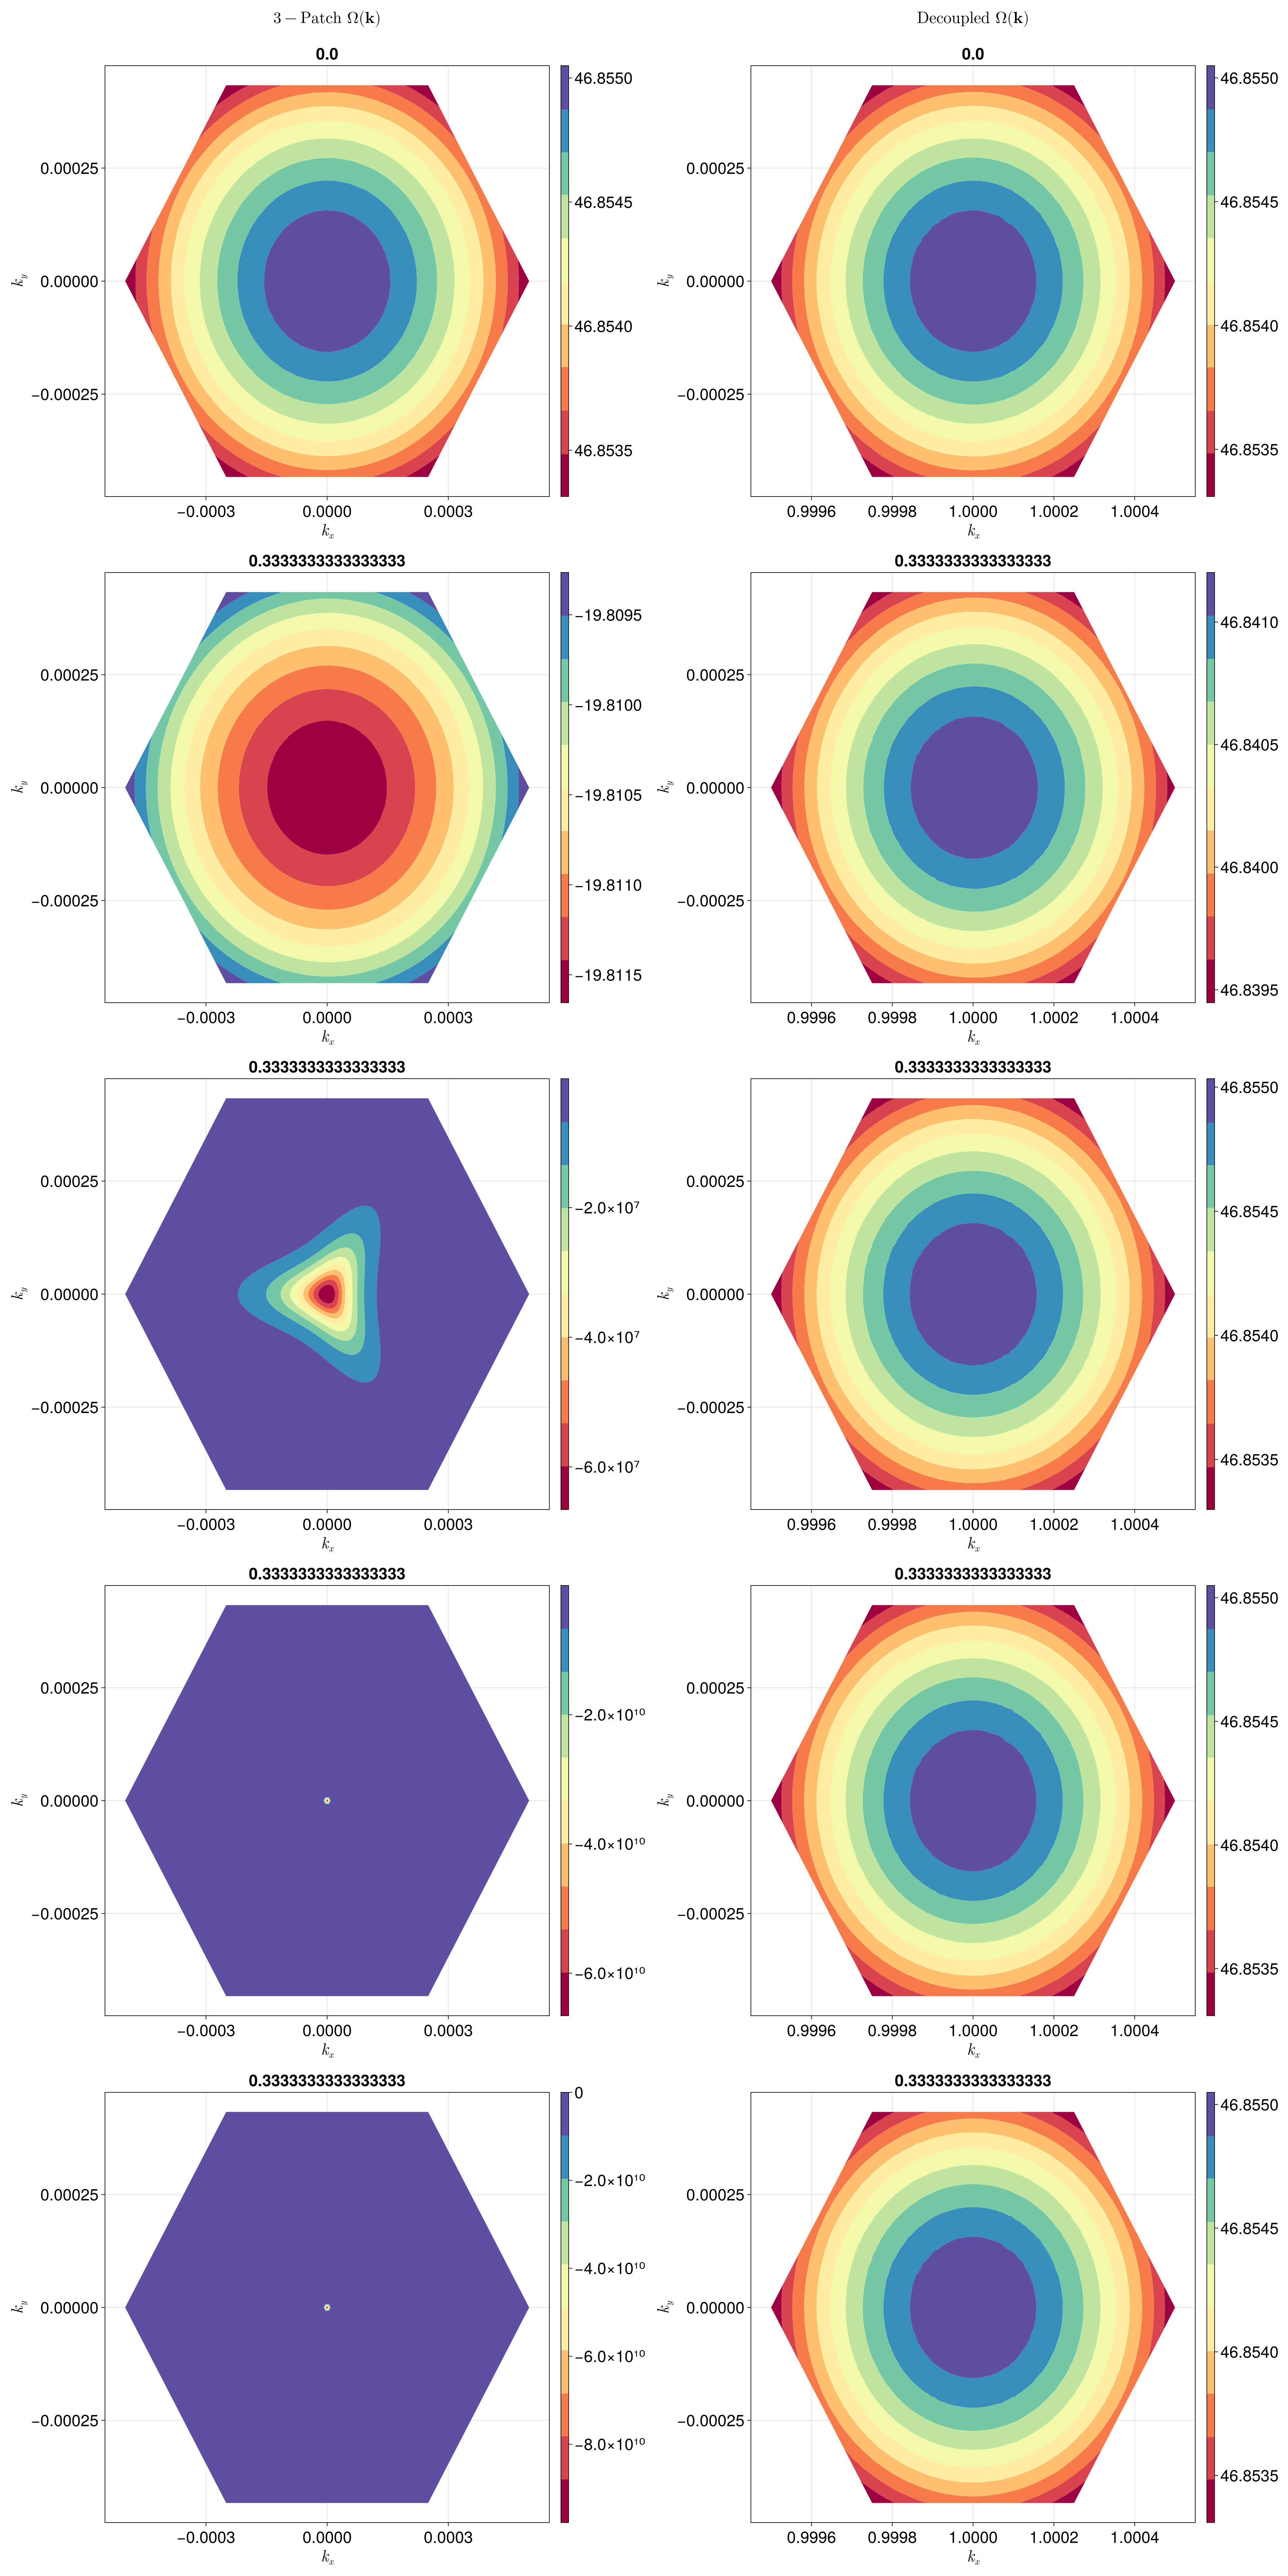

In [22]:
rmg_decoupled_comp(pd, w, spacing, a, uD, t0, t1, t2, t3, t4, Nl, index, kappa, vF, delta, alpha_list)